In [2]:
import pandas as pd
import numpy as np
import json
from pathlib import Path
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [78]:
pd.set_option('display.max_colwidth', None)

In [36]:
# Add in your own path to the folder with all the .json files
def parse_jsons(): 
    paths = Path('/home/bash/news_dataset/clavin/cc_download_articles').glob('**/*.json')
    jsonlist = []
    for path in paths:
        path_in_str = str(path)
        with open(path_in_str) as jsonfile:
            # jsonfile.seek(0)
            # a_json = json.load(jsonfile)
            try:
                jsonlist.append(json.load(jsonfile))
            except:
                print(path_in_str)
    return jsonlist

In [ ]:
entries = parse_jsons()

In [38]:
len(entries)

2890527

In [40]:
date, description, image_url, text, title, domain, url = [], [], [],[], [], [], []
for entry in tqdm(entries):
    if entry['language'] == 'en':
        date.append(entry['date_publish'])
        description.append(entry['description'])
        image_url.append(entry['image_url'])
        text.append(entry['maintext'])
        title.append(entry['title'])
        domain.append(entry['source_domain'])
        url.append(entry['url'])


100%|██████████| 2890527/2890527 [00:02<00:00, 1439621.96it/s]


In [86]:
data = pd.DataFrame(list(zip(date, title, text, domain, url, image_url, description)),
 columns = ['date', 'title', 'text', 'domain', 'url', 'image_url', 'description'])

In [87]:
data['date'] = pd.to_datetime(data['date'])

In [88]:
data = data.sort_values(by = ['date'], ignore_index = True)

In [91]:
data.shape[0]

1311051

In [90]:
data.tail()

,date,title,text,domain,url,image_url,description
1311046,2066-01-03,Strangeways prisoners found with copy of al Qaida magazine,"Get daily updates directly to your inbox + Subscribe Thank you for subscribing! Could not subscribe, try again later Invalid Email\nInmates at Strangeways prison have been found with copies of an al Qaida magazine, new figures reveal.\nTwo prisoners in high security HMP Manchester were discovered with Inspire, the banned terror group’s publication, in 2012 and 2013, according to the Ministry of Justice.\nInspire was also found in prisons in Durham and London over the last five years.\nThe magazine formed part of the prisoners’ defence case paperwork, but possession of it could be a criminal offence and in each case it was removed.\nThe figures were released in response to a parliamentary question tabled by shadow justice secretary Richard Burgon.\nThey show that in 2011 a prisoner at Belmarsh Prison in London was found with the terror magazine, while in 2012 and 2013 two prisoners at HMP Manchester were caught with it. In 2013 an inmate at HMP Woodhill in Milton Keynes had it, and in 2015 a prisoner at HMP Frankland in Durham had it confiscated.\nResponding to the parliamentary question, justice minister Sam Gyimah said: “The possession or smuggling of material associated with a proscribed group may be an offence under section two of the Terrorism Act 2006 or under section 22 of the Offender Management Act 2007.”\nHe added: “We will not tolerate extremist material in prisons and where found it is removed and, if appropriate, referred to the police.”",www.manchestereveningnews.co.uk,http://www.manchestereveningnews.co.uk/news/greater-manchester-news/strangeways-prisoners-found-copy-al-12443679,http://i4.manchestereveningnews.co.uk/incoming/article12188629.ece/ALTERNATES/s1200/JS34082066-1.jpg,"Two prisoners in high security HMP Manchester were discovered with Inspire, the banned terror group’s publication, in 2012 and 2013, according to the Ministry of Justice"
1311047,2069-01-15,Bloomberg узнал о доставке в военные госпитали в России раненых наемников из Сирии,None,ca-news.org,http://ca-news.org/news:1432069/?from=rss,https://static-2.akipress.org/127/.upload/kgnews/9/1432069.1.1518684946.jpg,"Раненые российские наемники, воюющие в Сирии, доставлены в госпитали Минобороны РФ в Москве и Санкт-Петербурге, сообщает Bloomberg со ссылкой на два источника, которые находятся в контакте с ними. Один из собеседников агентства рассказывает, что некоторые из получивших тяжелые ранения умирают в больницах.\r\nЗаведующий отделением хирургии ЦВКГ им. А.А.Вишневского Алексей Колтунов в беседе с РБК отказался от комментариев. Начальник неотложного отделения главного военного клинического госпиталя им. Н.Н.Бурденко Артур Керимов также отказался от комментариев РБК. Издание отправило запрос в Минобороны и департамент здравоохранения Москвы."
1311048,2078-02-05,Scots firms 'miss out on £3.5bn a year of local council procurement',"Get Daily updates directly to your inbox Subscribe See our privacy notice Thank you for subscribing! Could not subscribe, try again later Invalid Email\nScottish businesses are missing out on a mammoth £3.5 billion a year of local council procurement - losing nearly half of all contracts from Scotland's 32 local authorities in the past ten years.\nThe startling figures show that the average Scottish council is spending less locally than it did ten years ago, despite Scottish Government reforms designed to increase local procurement.\nThe Federation of Small Businesses (FSB), said the statistics – published by the Improvement Service - underlined the need for First Minister Nicola Sturgeon to set out robust new procurement measures when she unveils her Programme for Government in Holyrood tomorrow.\nFSB’s Scotland Policy Chair Andrew McRae, said: “The Scottish public sector is a serious economic player. It spends around £11 billion buying goods and services every year – money that, if spent sma

<AxesSubplot:xlabel='date', ylabel='text'>

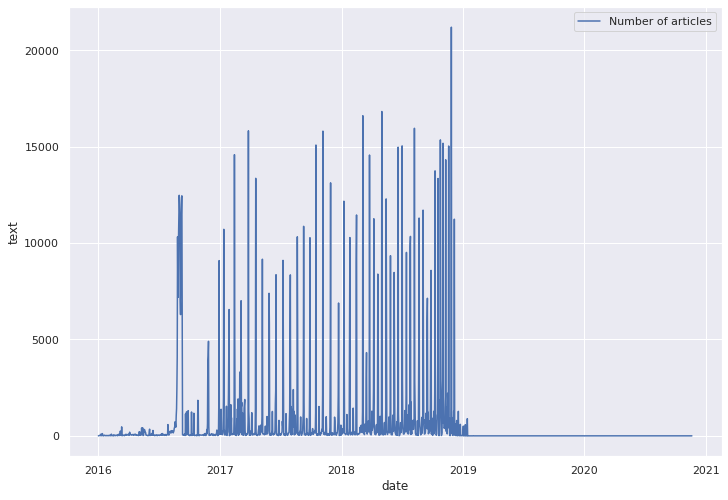

In [92]:
data_visualise = data.loc[(data['date'] < datetime.strptime('2021-01-01', '%Y-%m-%d')) & (data['date'] > datetime.strptime('2016-01-01', '%Y-%m-%d'))]
data_visualise = data_visualise.groupby(pd.Grouper(key = 'date', freq = '1D')).count()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = data_visualise, x = 'date', y = 'text', label = 'Number of articles')

# Majority of data only from Jan 2017-Jan 2019; Will use that as our window

<AxesSubplot:xlabel='date', ylabel='text'>

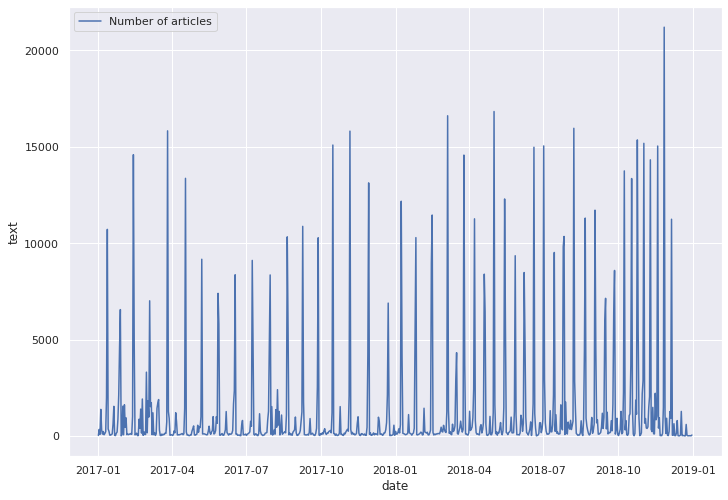

In [93]:
data_visualise = data.loc[(data['date'] < datetime.strptime('2019-01-01', '%Y-%m-%d')) & (data['date'] > datetime.strptime('2017-01-01', '%Y-%m-%d'))]
data_visualise = data_visualise.groupby(pd.Grouper(key = 'date', freq = '1D')).count()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = data_visualise, x = 'date', y = 'text', label = 'Number of articles')


In [95]:
# Examine if the data extracted is correct (do publish dates of url on peak days correspond to correct date?)
data_peaks = data_visualise[data_visualise['text'] > 10000]

In [96]:
data_peaks

,title,text,domain,url,image_url,description
date,,,,,,
2017-01-12,11702,10712,11708,11708,11708,9280
2017-02-13,15938,14583,15949,15949,15949,12200
2017-03-27,18091,15820,18097,18097,18097,14330
2017-04-18,16092,13357,16100,16100,16100,13117
2017-08-21,11849,10323,11862,11862,11862,8459
2017-09-09,12488,10868,12502,12502,12502,9440
2017-09-28,11793,10275,11796,11796,11796,9408
2017-10-16,16514,15084,16518,16518,16518,12941
2017-11-06,17293,15805,17296,17296,17296,13918


In [100]:
data[data['date'] == '2018-09-03'][['url']].sample(15)

,url
1040711,https://lenta.ru/news/2018/09/03/returning/
1040991,https://www.tri-cityherald.com/sports/nfl/seattle-seahawks/article217776610.html
1042086,https://www.tri-cityherald.com/entertainment/celebrities/article217757970.html
1041635,https://www.b92.net/eng/news/world.php?yyyy=2018&mm=09&dd=03&nav_id=104989
1040471,https://x96.com/life/man-arrested-for-giving-girlfriend-a-wet-willy/
1040213,https://www.topky.sk/cl/10/1735159/Burky-opat-trapia-Slovensko--Hasici-zasahuju-v-oblasti-Nitry--na-severe-hrozba-povodni
1040425,https://www.news.gr/oikonomia/energia/article/1284941/ti-provlepi-to-schedio-gia-ta-ktiria-midenikis-energiakis-katanalosis.html
1040817,https://www.kansas.com/sports/college/big-12/kansas-state/article217761330.html
1041252,https://www.thestar.com/news/world/2018/09/03/climate-change-overfishing-potential-cause-for-dwindling-puffin-population.html
1041369,http://www.asianjournal.com/life-style/arts-culture/pia-wurtzbach-becomes-first-filipino-to-get-madame-tussauds-figure/


In [ ]:
# Save as json file (Jan 2017 to Dec 2018)
data_visualise = data.loc[(data['date'] < datetime.strptime('2019-01-01', '%Y-%m-%d')) & (data['date'] > datetime.strptime('2017-01-01', '%Y-%m-%d'))]
data_visualise.to_json('cc_news_selfextracted.json')

In [4]:
data_visualise = pd.read_json('cc_news_selfextracted.json')

In [7]:
data_visualise.head(50)['title']

244916                            Where to Stream and Watch
244917                            Where to Stream and Watch
244918                                 The Perfect Physique
244919                                         To Be A Miss
244920                                     Senorita Justice
244921                            Where to Stream and Watch
244922                            Where to Stream and Watch
244923                                     Eyes of an Angel
244924                                    The Spy Next Door
244925                            Where to Stream and Watch
244926                            Where to Stream and Watch
244927                            Where to Stream and Watch
244928                            Where to Stream and Watch
244929                                      The Long Riders
244930                   Today in History for December 31st
244931                                    Norm of the North
244932                            Where 

In [3]:
data_visualise = data_visualise.groupby(pd.Grouper(key = 'date', freq = '1D')).count()

In [19]:
data_visualise.loc['2017-05-25']

title          341
text           274
domain         341
url            341
image_url      341
description    246
Name: 2017-05-25 00:00:00, dtype: int64

In [7]:
data_peaks = data_visualise[data_visualise['text'] > 5000]

In [8]:
data_peaks

,title,text,domain,url,image_url,description
date,,,,,,
2017-01-12,11702,10712,11708,11708,11708,9280
2017-01-28,7555,6552,7569,7569,7569,5797
2017-02-13,15938,14583,15949,15949,15949,12200
2017-03-05,8093,7008,8107,8107,8107,6284
2017-03-27,18091,15820,18097,18097,18097,14330
2017-04-18,16092,13357,16100,16100,16100,13117
2017-05-08,10996,9162,11002,11002,11002,8738
2017-05-28,8507,7394,8508,8508,8508,5780
2017-05-29,6829,5800,6830,6830,6830,5181


In [104]:
data_visualise.shape[0]

1046269